<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 5**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [1]:
#from google.colab import files
#uploaded = files.upload()
# upando train_data e test_data_solution

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
import random
import nltk
import re
import time
import umap
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from bokeh.palettes import Category20
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [5]:
output_notebook() 

In [6]:
nltk.download('stopwords'); 
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 10000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 10000)
df2.columns = ['id', 'title', 'genre', 'description']

In [8]:
df3 = pd.concat([df, df2], ignore_index=True)
df3.drop('id', axis=1, inplace=True)
comedy = df3.loc[df3['genre'].str.contains('comedy')]
drama = df3.loc[df3['genre'].str.contains('drama')]
dataset = pd.concat([comedy, drama], ignore_index=True)

In [9]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [10]:
dataset['processed_description'] = dataset.description.apply(preprocess)

In [11]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [12]:
dataset['processed_description'] = dataset.processed_description.apply(remove_stopwords)

In [13]:
dataset

,title,genre,description,processed_description
0,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic times max joey run ideas discov...
1,Babylon Vista (2001),comedy,Frankie Reno was a child star on a TV show. B...,frankie reno child star tv show thirty years a...
2,Söderpojkar (1941),comedy,A gang of unemployed itinerant musicians play...,gang unemployed itinerant musicians play south...
3,Tunnel Vision (1976),comedy,A committee investigating TV's first uncensor...,committee investigating tvs first uncensored n...
4,"""The Young Professionals"" (2015)",comedy,"Whether it's blocking up mouse holes, running...",whether blocking mouse holes running landlords...
...,...,...,...,...
7734,Merrick (2017/I),drama,Ten years after a terrible disease has killed...,ten years terrible disease killed majority hum...
7735,Three Windows and a Hanging (2014),drama,In a traditional village where life is gradua...,traditional village life gradually rebuilt sch...
7736,Placebo (2013/II),drama,Alfred spent years as a patient in a mental i...,alfred spent years patient mental institution ...
7737,Times Square (????),drama,Set amidst the transformation of Times Square...,set amidst transformation times square new yor...


## Questão 1

O objetivo dessa questão é desenvolver um buscador de documentos.

a) escolha e aplique um modelo do tipo word2vec a seus textos, compatível com o idioma de seus textos (inglês ou português).

b) escolha 5 palavras de consulta que não estejam em nenhum dos textos. Para cada palavra de consulta, encontre as 3 palavras de seu conjunto de textos mais parecidas com cada uma das palavras de consulta e exiba os documentos onde estas palavras aparecem.

c) Seja d um documento da base e w uma palavra de consulta. Implemente o
seguinte algoritmo para buscar documentos:
1. Encontre d10(w): a lista com as 10 palavras mais parecidas com w em
um certo documento d.
2. Para cada documento d, calcule a distância média DM10(w) entre w e
as palavras de d10(w).
3. Recupere os 3 documentos da base cuja DM10(w) é menor.

d) aplique o algoritmo para buscar documentos em 5 palavras distintas, e exiba
os 3 documentos mais próximos de cada um.

In [14]:
import gensim
from gensim.models import KeyedVectors

In [15]:
def vocabulary(descriptions):
    vocab = ' '.join([description for description in descriptions])
    return sorted(set(vocab.split(' ')))

processed_descriptions_vocab = vocabulary(dataset.processed_description.values)

In [16]:
search_five_words = random.sample(processed_descriptions_vocab, 5)
search_five_words

['ohne', 'toosmall', 'jules', 'deposed', 'wright']

In [17]:
modelPath = open('/content/drive/MyDrive/skip_s300.txt', 'r', encoding='iso8859-1')

In [18]:
#essa func demora uns 6min pra rodar 
def sim_words(search_word, n):
  similar = []
  for word in processed_descriptions_vocab:
    try:
      similarity = embedding.similarity(word, search_word)
    except:
      similarity = -1
    similar.append(similarity)
  similar = np.argsort(similar)[-(n+1):-1]
  similar = similar[::-1]
  return [processed_descriptions_vocab[i] for i in similar]

print('\nModelo SKIP-GRAM 300')
embedding = KeyedVectors.load_word2vec_format(modelPath)
print('Palavras mais similares')
similar_words = []
for search_word in search_five_words:
  sim_search_word = sim_words(search_word, 3)
  print(f'\t{search_word} -> {str(sim_search_word)}')
  similar_words.append({'search_word': search_word, 'similar_words': sim_search_word})


Modelo SKIP-GRAM 300
Palavras mais similares
	ohne -> ['nach', 'ersten', 'einen']
	toosmall -> ['founding', 'fourchild', 'fourbieux']
	jules -> ['henri', 'pierre', 'antoine']
	deposed -> ['founding', 'fourchild', 'fourbieux']
	wright -> ['graham', 'mitchell', 'phillips']


In [19]:
def words_list(search_word):
  for word_list in similar_words:
    if search_word == word_list['search_word']:
      return word_list['similar_words']

def documents(word_list):
  df = []
  for word in word_list:
    dataframe = dataset[dataset.processed_description.apply(lambda description: word in description.split(' '))]
    df.append(dataframe[['title', 'genre']])
  return pd.concat(df).drop_duplicates().reset_index(drop = True)

In [20]:
for search_word in search_five_words:
  word_list = words_list(search_word=search_word)
  search_docs = documents(word_list)
  display(HTML(f'<h3>Modelo SKIP-GRAM 300<br><br>Palavra de busca [{search_word}]<br><br>Palavras similares {word_list}</h3>'))
  display(HTML(search_docs.head().to_html()))

,title,genre
0,"""Türkisch für Anfänger"" (2006)",comedy
1,Epsteins Nacht (2002),drama


,title,genre
0,Grand Illusion Part I (2011),drama
1,L.A. Law: The Movie (2002),drama
2,La guerre est déclarée (2011),drama
3,Kümes (2015),drama
4,Douze heures d'horloge (1959),drama


,title,genre
0,Hotel Paradiso (1966),comedy
1,Le secret de Polichinelle (1936),comedy
2,El haram (1965),drama
3,La corde raide (1960),drama
4,Mon curé chez les riches (1938),comedy


,title,genre
0,Grand Illusion Part I (2011),drama
1,L.A. Law: The Movie (2002),drama
2,La guerre est déclarée (2011),drama
3,Kümes (2015),drama
4,Douze heures d'horloge (1959),drama


,title,genre
0,License to Drive (1988),comedy
1,"Live, Love and Learn (1937)",comedy
2,The Heart Is a Rebel (1958),drama
3,HappySAD (2009),drama
4,Out of the Darkness (2016/I),drama


## Questão 2
Aplicando a representação Doc2Vec:

a) Resolva a segunda questão da 3a lista com esta nova representação e compare com os resultados obtidos anteriormente.

b) Resolva a segunda e terceira questão da 4a lista com esta nova representação e compare com os resultados obtidos anteriormente.


In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [22]:
paragraphs = dataset.processed_description.values
paragraphs = [paragraph.split(' ') for paragraph in paragraphs]

In [23]:
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(paragraphs)]

In [24]:
doc_embedding = Doc2Vec(docs, vector_size = 300, window = 10, min_count = 2, workers = 4)

In [25]:
X = np.array([doc_embedding[i] for i, description in enumerate(dataset.processed_description.values)])

In [26]:
lbl_to_ind = {
    ' comedy ': 0, ' drama ': 1, 
}
y = [lbl_to_ind[l] for l in dataset.genre.values[:7739]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [28]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

In [29]:
print(pd.Series(y_res).value_counts())

1    1920
0    1920
dtype: int64


In [31]:
classifier = LogisticRegression().fit(X_res, y_res)

In [32]:
y_pred = classifier.predict(X_test)

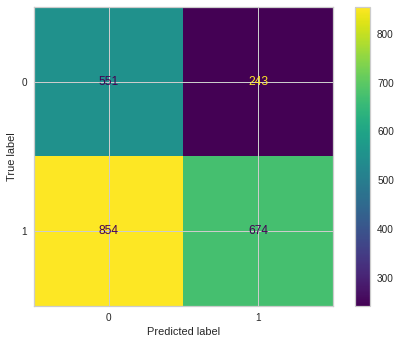

In [33]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [34]:
print('Modelo Regressão Logísitca')
lr_metrics = {
    'Acurácia': accuracy_score(y_test, y_pred),
    'Precisão': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
lr_metrics

Modelo Regressão Logísitca


{'Acurácia': 0.5275624461670974,
 'F1 Score': 0.5513292433537833,
 'Precisão': 0.7350054525627044,
 'Recall': 0.4410994764397906}

In [35]:
classifier = SVC().fit(X_res, y_res)

In [36]:
y_pred = classifier.predict(X_test)

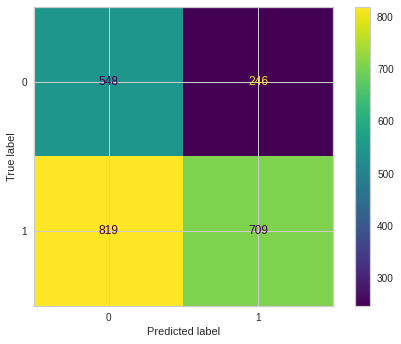

In [37]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [38]:
print('Modelo SVM')
svm_metrics = {
    'Acurácia': accuracy_score(y_test, y_pred),
    'Precisão': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
svm_metrics

Modelo SVM


{'Acurácia': 0.541343669250646,
 'F1 Score': 0.5710833668948853,
 'Precisão': 0.7424083769633508,
 'Recall': 0.4640052356020942}

In [39]:
pd.DataFrame([lr_metrics, svm_metrics])

,Acurácia,Precisão,Recall,F1 Score
0,0.527562,0.735005,0.441099,0.551329
1,0.541344,0.742408,0.464005,0.571083


In [40]:
X_proj = PCA(n_components=.95).fit_transform(X)

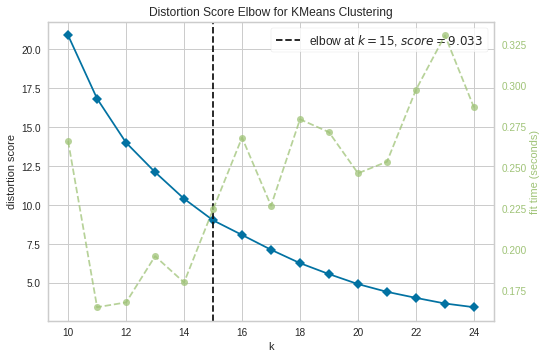

In [41]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X_proj)
visualizer.show() 

In [42]:
k = 15
kmeans = KMeans(n_clusters=k).fit(X_proj)

In [43]:
start = time.time()
X_tsne = TSNE(n_components=2).fit_transform(X_proj)
duration = time.time() - start

In [44]:
print('%s segundos' % duration)

39.02955150604248 segundos


In [45]:
palette = Category20[k]

In [46]:
#nao sei se as plotagens estao certas
def scatter_plot(X, labels):
    scatter_plot = figure(plot_width=1000, plot_height=500)
    scatter_plot.circle(X[:, 0], X[:, 1], size=10, line_color=[palette[l] for l in labels], fill_color=[palette[l] for l in labels], fill_alpha=.8)
    show(scatter_plot)

scatter_plot(X_tsne, kmeans.labels_)

In [47]:
start = time.time()
X_umap = umap.UMAP().fit_transform(X_proj)
duration = time.time() - start

In [48]:
print('%s segundos' % duration)

38.01289653778076 segundos


In [49]:
scatter_plot(X_umap, kmeans.labels_)

**Referências**

[Repositório de Word Embeddings do NILC](http://www.nilc.icmc.usp.br/embeddings)

[Word2Vec — CBOW & Skip-gram : Algorithmic Optimizations](https://medium.com/analytics-vidhya/word2vec-cbow-skip-gram-algorithmic-optimizations-921d6f62d739)

[Documentation - gensim](https://radimrehurek.com/gensim/auto_examples/index.html)

[Pln repository](https://github.com/valeriojr/ecom063-pln/blob/master/Processamento%20de%20linguagem%20natural%20-%205%C2%AA%20lista%20de%20exerc%C3%ADcios.ipynb)

[NLP: Word Embedding Techniques Demystified](https://towardsdatascience.com/nlp-embedding-techniques-51b7e6ec9f92#:~:text=Doc2Vec%20is%20another%20widely%20used,every%20document%20in%20the%20corpus.)

[A gentle introduction to Doc2Vec](https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)

[Como lidar com dados desbalanceados?](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)